#### (1) 데이터 가져오기   
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.   
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.   

In [164]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

print(df_X.shape, df_y.shape)

(442, 10) (442,)


#### (2) 모델에 입력할 데이터 X 준비하기
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [165]:
import numpy as np
df_X = np.array(df_X)
type(df_X)

numpy.ndarray

#### (3) 모델에 예측할 데이터 y 준비하기   
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [166]:
df_y = np.array(df_y)
type(df_y)

numpy.ndarray

#### (4) train 데이터와 test 데이터로 분리하기
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [211]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state= 10)

print(x_train.shape, y_train.shape)

(353, 10) (353,)


#### (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.   

모델 함수를 구현해주세요.

In [168]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#### (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [169]:
def MSE_LOSS(y, y_pred):
    mse = ((y_pred - y)**2).mean()
    return mse

#### (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [170]:
def gradient(X,y,W,b):
    pred = model(X,W,b)
    dW = 1/10 * X.T.dot(pred-y)
    db = 2*(pred-y).mean()
    return dW,db


#### (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요   
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [209]:
lr = 0.01
W = np.random.rand(10)
b = np.random.rand()
loss = []

for i in range(1, 10000):
    dW, db = gradient(x_train, y_train, W, b)
    W -= lr * dW
    b -= lr * db
    y_pred = model(x_train, W, b)
    loss = MSE_LOSS(y_train, y_pred)
    print(f"loss:{loss}")

loss:28213.541931959986
loss:27310.862124913132
loss:26443.48518449831
loss:25610.015438627594
loss:24809.112478007664
loss:24039.488967429024
loss:23299.908543743593
loss:22589.183797097252
loss:21906.174332119757
loss:21249.78490590513
loss:20618.963639741167
loss:20012.700301666893
loss:19430.024657052832
loss:18870.00488450973
loss:18331.746054538406
loss:17814.388668435586
loss:17317.10725506922
loss:16839.109023231238
loss:16379.632567366403
loss:15937.946624563258
loss:15513.348880776743
loss:15105.164824332638
loss:14712.746644841025
loss:14335.472175720308
loss:13972.743878604497
loss:13623.987867974822
loss:13288.652974422568
loss:12966.209845013007
loss:12656.150079280957
loss:12357.985399446727
loss:12071.246853497054
loss:11795.48404982933
loss:11530.264422208991
loss:11275.172523839465
loss:11029.809349391584
loss:10793.791683885085
loss:10566.75147735864
loss:10348.335244307027
loss:10138.203486904475
loss:9936.030141072071
loss:9741.502044484443
loss:9554.318425646778
l

#### (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.   
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.   
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [192]:
import pandas as pd
new_data = pd.DataFrame(data.data)

<AxesSubplot:>

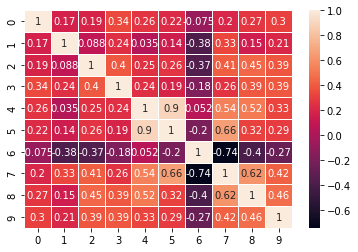

In [193]:
import seaborn as sns

sns.heatmap(new_data.corr(), annot=True, linewidths=0.5)

In [208]:
# import pandas as pd
# new_data = pd.DataFrame(data.data)
# corr_matrix = new_data.corr()
# corr_matrix

# threshold = 0.1

# cdrop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) < threshold)]
# df_filtered = new_data.drop(columns=cdrop)
# print(df_filtered)
# df_filtered = np.array(df_filtered)
# X_train, X_test, y_train, y_test = train_test_split(df_filtered, df_y, test_size=0.2, random_state= 10)

# W = np.random.rand(len(corr_matrix.columns)-len(cdrop))
# b = np.random.rand()
# lr = 0.01


# for i in range(1, 10000):
#     dW, db = gradient(X_train, y_train, W, b)
#     W -= lr * dW
#     b -= lr * db
#     y_pred = model(x_train, W, b)
#     loss = MSE_LOSS(y_train, y_pred)
#     print(f"loss:{loss}")

#### (10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [214]:
from sklearn.metrics import mean_squared_error

predictions = model(x_test, W, b)
mse = mean_squared_error(y_test, predictions)
mse


2943.6647803893616

#### (11) 정답 데이터와 예측한 데이터 시각화하기   
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

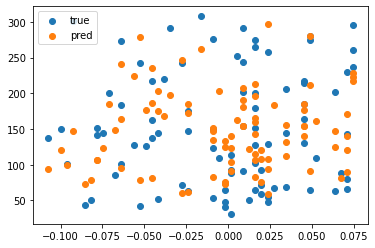

In [215]:
plt.scatter(x_test[:, 0], y_test, label="true")
plt.scatter(x_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()